<a href="https://colab.research.google.com/github/srinivas2234/VLabd_Assignment/blob/main/Final_Vlab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os

#from plotly import plotly
#from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
from plotly import graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
drive.mount("/content/drive/MyDrive/Datasets/Consolidated_Email_Data", force_remount=True)

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Datasets/Consolidated_Email_Data

/content/drive/MyDrive/Datasets/Consolidated_Email_Data


In [ ]:
Pre_pro_bal_data = pd.read_pickle("data_upsampled.pkl")
Pre_pro_bal_data

Id                                         Email_Text Class_Label
1     125706  the brilliance women jdasovic nsf the friday b...           1
2       8627  davis energy advisors draw sec attention htm j...           1
3     138105  re rshapiro non privileged pst robert here upd...           1
5     121752  confidential residential ca jdasovic nsf i lik...           1
6     125769  energy issues jdasovic nsf miyung you seem fin...           1
...      ...                                                ...         ...
583   173777  price cap media draft skean nsf i agree mona n...           6
1497  177845  last final version skean non privileged pst ha...           6
530   173837  rich products skean nsf looks good peggy mahon...           6
555   177844  uc csu enron press release skean non privilege...           6
1630  176584  uc csu enron press release skean nsf is altern...           6

[5034 rows x 3 columns]

# Word to vector using gensim

In [ ]:
#Taken from https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/42_word2vec_gensim/42_word2vec_gensim.ipynb

import gensim
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
Tokenised_text = Pre_pro_bal_data['Email_Text'].apply(gensim.utils.simple_preprocess)
gensim_model = gensim.models.Word2Vec(window=10, min_count=2, workers=4, )
gensim_model.build_vocab(Tokenised_text, progress_per=1000)
gensim_model.train(Tokenised_text, total_examples=gensim_model.corpus_count, epochs=gensim_model.epochs)
# gensim_model.wv.most_similar("bad")
# gensim_model.wv["bad"]

(8449751, 10033380)

In [ ]:
gensim_model.wv["dollar"]

In [ ]:
# get_sentence_embeding([
#     "500$ discount. hurry up", 
#     "Bhavin, are you up for a volleybal game tomorrow?"])

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
w2v_google = api.load('word2vec-google-news-300')

[=================================================-] 99.9% 1661.9/1662.8MB downloaded


In [ ]:
w2v_google

In [ ]:
w2v_glove = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
w2v_glove

NameError: ignored

# Tokenization of dataset

In [ ]:
import spacy
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
pun = string.punctuation

def spacy_tokenizer(sentences):
  tok_sen = nlp(sentences)
  full_tokens = [w for w in tok_sen]
  return full_tokens
Pre_pro_bal_data['Tokenized_Email_Text'] = Pre_pro_bal_data['Email_Text'].apply(spacy_tokenizer)  

In [ ]:
# gensim_model.wv["dollar"]
# gensim_model.wv.vector_size

In [ ]:
def sent_to_vec_gensim(sentence,w2v):
  #sentence = ','.join([str(elem) for elem in sentence])    
  vec_size = w2v.vector_size
  word2vec_sent = np.zeros(vec_size)
  cnt = 1
  for word in sentence:    
    if str(word) in w2v:      
      cnt= cnt+1
      word2vec_sent += w2v[str(word)]
    else:
      continue
  word2vec_sent = word2vec_sent/cnt
  return word2vec_sent

In [ ]:
# v = sent_to_vec2(aa[0],gensim_model.wv)
# v.shape

# Text to vector convertion

Average word 2 vector using gensim

In [ ]:
#gensim_avg_w2vec[]
#gensim_model.wv["dollar"]

In [ ]:
# aa = Pre_pro_bal_data['Tokenized_Email_Text'][0:5].values


Averaging sentences and word to vector convertion using google and glove embeddings

In [ ]:
def sent_to_vec(sentence,w2v):
  sentence = ' '.join([str(elem) for elem in sentence])  
  vec_size = w2v.vector_size
  word2vec_sent = np.zeros(vec_size)
  cnt = 1
  for word in sentence:
    if word in w2v:
      cnt= cnt+1
      word2vec_sent += w2v[word]
  word2vec_sent = word2vec_sent/cnt
  return word2vec_sent 

  # google_vec_size = w2v_google.vector_size
  # glove_vec_size = w2v_glove.vector_size
  # google_word2vec_sent = np.zeros(google_vec_size)
  # glove_word2vec_sent = np.zeros(glove_vec_size)
  # goo_cnt = 1
  # glo_cnt = 1
  # for word in sentence:
  #   if word in w2v_google: 
  #     goo_cnt = goo_cnt+1
  #     google_word2vec_sent += w2v_google[word]
  #   if word in w2v_glove:
  #     glo_cnt = glo_cnt+1
  #     glove_word2vec_sent += w2v_glove[word]  
  # google_word2vec_sent = google_word2vec_sent/goo_cnt
  # glove_word2vec_sent = glove_word2vec_sent/glo_cnt
  
  # return google_word2vec_sent,glove_word2vec_sent


In [ ]:
Pre_pro_bal_data['gensim_Vector_Email_Text'] = Pre_pro_bal_data['Tokenized_Email_Text'].apply(sent_to_vec_gensim,w2v=gensim_model.wv)


In [ ]:
Pre_pro_bal_data['google_Vector_Email_Text'] = Pre_pro_bal_data['Tokenized_Email_Text'].apply(sent_to_vec,w2v=w2v_google)


In [ ]:
Pre_pro_bal_data['glove_Vector_Email_Text'] = Pre_pro_bal_data['Tokenized_Email_Text'].apply(sent_to_vec,w2v=w2v_glove)

In [ ]:
Pre_pro_bal_data.head(10)

Id                                         Email_Text Class_Label  \
1   125706  the brilliance women jdasovic nsf the friday b...           1   
2     8627  davis energy advisors draw sec attention htm j...           1   
3   138105  re rshapiro non privileged pst robert here upd...           1   
5   121752  confidential residential ca jdasovic nsf i lik...           1   
6   125769  energy issues jdasovic nsf miyung you seem fin...           1   
7   179001  privileged confidential attorney client commun...           1   
8   177235  energy issues skean nsf please see following a...           1   
9    52167   vkamins non privileged pst vince i hearing ru...           1   
11  125762  energy issues jdasovic nsf please see followin...           1   
12  125832  energy issues jdasovic nsf please see followin...           1   

                                 Tokenized_Email_Text  \
1   [the, brilliance, women, jdasovic, nsf, the, f...   
2   [davis, energy, advisors, draw, sec, attention...   
3   [re, rshapiro, non, privileged, pst, robert, h...   
5   [confidential, residential, ca, jdasovic, nsf,...   
6   [energy, issues, jdasovic, nsf, miyung, you, s...   
7   [privileged, confidential, attorney, client, c...   
8   [energy, issues, skean, nsf, please, see, foll...   
9   [ , vkamins, non, privileged, pst, vince, i, h...   
11  [energy, issues, jdasovic, nsf, please, see, f...   
12  [energy, issues, jdasovic, nsf, please, see, f...   

                             gensim_Vector_Email_Text  \
1   [0.07782700196057393, 0.050153660474690956, -0...   
2   [-0.03187560640022497, 0.4375928924369482, 0.0...   
3   [0.30696008355952187, 0.07870078841835017, -0....   
5   [-0.004620349572518809, 0.41446014588892877, -...   
6   [0.0791521082252418, 0.41686117996893407, -0.2...   
7   [0.46800276938269153, 0.15362716035889393, -0....   
8   [0.12019978765305676, 0.3971145620991444, -0.1...   
9   [0.5679471493315065, -0.12474968095500924, -0....   
11  [-0.0018917023152832258, 0.3601765008568964, -...   
12  [0.10717615216290209, 0.23263296257586838, -0....   

                             google_Vector_Email_Text  \
1   [-0.17754797473633233, 0.11514648227305747, -0...   
2   [-0.17820281793575476, 0.11229206311820757, -0...   
3   [-0.17345027979517963, 0.11764320530150293, -0...   
5   [-0.17469535209037163, 0.10611037795608108, 0....   
6   [-0.17744011908136054, 0.11496242606136628, -0...   
7   [-0.17558647246949702, 0.12120090601137118, -0...   
8   [-0.17716628924247887, 0.11526966396670023, -0...   
9   [-0.1739377053596665, 0.10963994571217849, -0....   
11  [-0.17760692454052585, 0.11522223109022803, -0...   
12  [-0.17754080710189082, 0.11610312513358008, -0...   

                              glove_Vector_Email_Text  
1   [-0.2635508257744685, 0.03717249722807679, -0....  
2   [-0.25109176386035353, 0.05526588231080903, -0...  
3   [-0.27659886548498186, 0.01490988378815689, -0...  
5   [-0.26398833657099735, 0.03888054064636589, -0...  
6   [-0.2587463138567054, 0.03423225395403021, -0....  
7   [-0.28295800378223385, 0.01086915068623453, -0...  
8   [-0.2616304516711978, 0.03200622312236057, -0....  
9   [-0.26735863286746786, 0.05337940859691419, -0...  
11  [-0.2566052793039592, 0.03466354062943365, -0....  
12  [-0.2614577647482571, 0.03376877338136802, -0....

In [ ]:
print(type(Pre_pro_bal_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
Pre_pro_bal_data.to_pickle_("Pre_pro_bal_data_all_type_w2v.pkl")

#pickle.dump(Pre_pro_bal_data['google_Vector_Email_Text','glove_Vector_Email_Text'], open( "Pre_pro_bal_data_all_type_w2v.p", "wb" ))

In [ ]:
with open('Pre_pro_bal_data_all_type_w2v.pkl', 'wb') as f:
    pickle.dump(Pre_pro_bal_data, f)

In [ ]:
Pre_pro_bal_data.to_csv('Pre_pro_bal_data_all_type_w2v.csv')

In [ ]:
Pre_pro_bal_data.to_csv('Pre_pro_bal_data_all_type_w2v.txt')

In [ ]:
Pre_pro_bal_data.head(10)

In [ ]:
#Pre_pro_bal_data = pd.read_csv('Pre_pro_bal_data_all_type_w2v.csv')

In [ ]:
#lst = Pre_pro_bal_data['google_Vector_Email_Text'].head(1)

In [ ]:
# for i in lst:
#   print(i)

# Model building and Classification 

1. Classification using Google word 2 vector representation


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,plot_roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from itertools import cycle

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



In [ ]:
def get_classification_results(model,X_train, X_test, y_train, y_test):
  model.fit(X_train,y_train)
  y_pred_train_prob = model.predict_proba(X_train)
  y_pred_test_prob = model.predict_proba(X_test)
  y_pred_train_lbls = model.predict(X_train)
  y_pred_test_lbls = model.predict(X_test)
  print("************Performance Evaluation for "+str(model)+" ***************************************")
  classes_lbls = ['1', '2', '3', '4','5','6']
  print(classification_report(y_test, y_pred_test_lbls, target_names=classes_lbls))
  accuracy_score(y_test, y_pred_test_lbls)
  
  conf_mat = confusion_matrix(y_test, y_pred_test_lbls)
  fig, ax = plt.subplots(figsize=(8,6))
  sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=classes_lbls, yticklabels=classes_lbls)
  ax.xaxis.tick_top()
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  y_test_bin = label_binarize(y_pred_test_lbls, classes=classes_lbls)
  n_classes = y_test_bin.shape[1]
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  colors = cycle(['blue', 'red', 'green', 'yellow', 'pink', 'black'])
  for i, color in zip(range(n_classes),colors):
      plt.plot(fpr[i], tpr[i], color=color,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for multi-class data')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
  plt.show()
  print("*********************************************************************************************")


In [ ]:
def Classification_over_models(X,y, word_2_vec_type):
  print("**************Classification of emails using "+str(word_2_vec_type)+"embeddings *********************")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  #scaler = MaxAbsScaler()    #MinMaxScaler()
  if word_2_vec_type == "TFIDF":
    scaler = MaxAbsScaler()    
  else:
    scaler = MinMaxScaler()
  nb = MultinomialNB(alpha=0.01)
  lr = LogisticRegression()
  bdt_real = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1)
  get_classification_results(nb,scaler.fit_transform(X_train), scaler.transform(X_test), y_train, y_test)
  get_classification_results(lr,X_train, X_test, y_train, y_test)

  linear_SVM = svm.SVC(kernel='linear', probability=True, C=1, decision_function_shape='ovo')
  rbf_SVM = svm.SVC(kernel='rbf', gamma=1, probability=True, C=1, decision_function_shape='ovo')
  poly_SVM = svm.SVC(kernel='poly', degree=3, probability=True, C=1, decision_function_shape='ovo')
  sig_SVM = svm.SVC(kernel='sigmoid', probability=True, C=1, decision_function_shape='ovo')
  get_classification_results(linear_SVM,X_train, X_test, y_train, y_test)
  get_classification_results(rbf_SVM,X_train, X_test, y_train, y_test)
  get_classification_results(poly_SVM,X_train, X_test, y_train, y_test)
  get_classification_results(sig_SVM,X_train, X_test, y_train, y_test)
  get_classification_results(bdt_real,X_train, X_test, y_train, y_test)

  print("**************End of classification of emails using "+str(word_2_vec_type)+"embeddings *****************")


In [ ]:
#Pre_pro_bal_data = pd.read_csv("Pre_pro_bal_data_all_type_w2v.csv")

In [ ]:
#Pre_pro_bal_data.head(5)

2. Classification using Glove word 2 vector representation

**************Classification of emails using TFIDFembeddings *********************
************Performance Evaluation for MultinomialNB(alpha=0.01) ***************************************
              precision    recall  f1-score   support

           1       0.91      0.86      0.88       189
           2       0.98      1.00      0.99       165
           3       0.93      0.95      0.94       156
           4       0.90      0.84      0.87       158
           5       0.96      1.00      0.98       178
           6       0.92      0.96      0.94       161

    accuracy                           0.93      1007
   macro avg       0.93      0.93      0.93      1007
weighted avg       0.93      0.93      0.93      1007



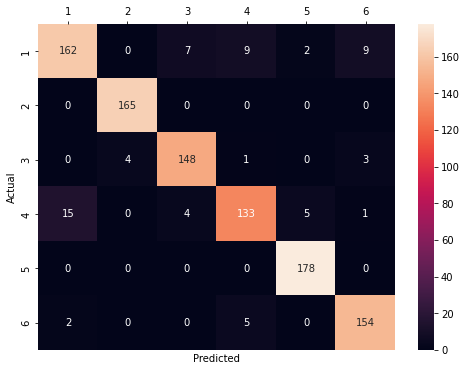

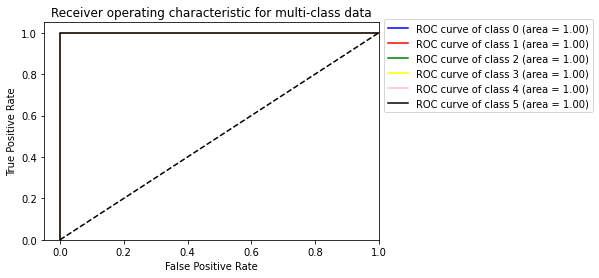

*********************************************************************************************
************Performance Evaluation for LogisticRegression() ***************************************
              precision    recall  f1-score   support

           1       0.94      0.83      0.88       189
           2       0.98      1.00      0.99       165
           3       0.96      0.99      0.97       156
           4       0.89      0.89      0.89       158
           5       0.98      1.00      0.99       178
           6       0.91      0.97      0.94       161

    accuracy                           0.94      1007
   macro avg       0.94      0.94      0.94      1007
weighted avg       0.94      0.94      0.94      1007



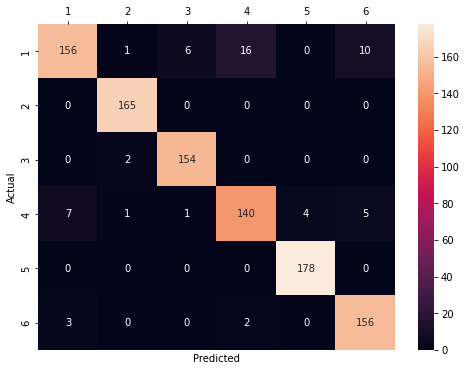

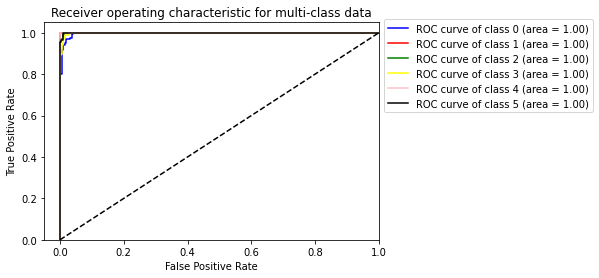

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='linear', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.96      0.86      0.91       189
           2       0.99      1.00      0.99       165
           3       0.97      0.99      0.98       156
           4       0.90      0.93      0.91       158
           5       0.98      1.00      0.99       178
           6       0.95      0.98      0.96       161

    accuracy                           0.96      1007
   macro avg       0.96      0.96      0.96      1007
weighted avg       0.96      0.96      0.96      1007



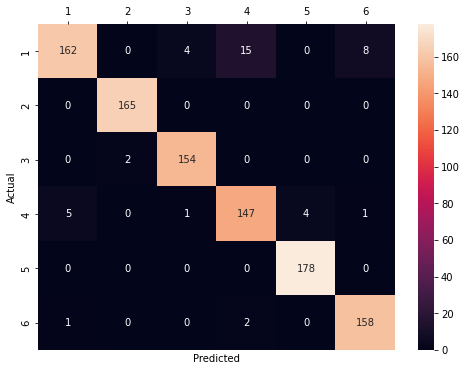

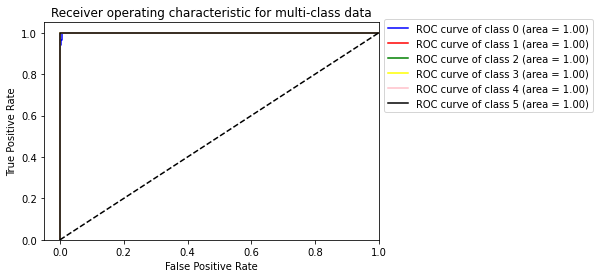

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', gamma=1, probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.95      0.92      0.93       189
           2       0.99      1.00      0.99       165
           3       0.97      0.99      0.98       156
           4       0.93      0.92      0.93       158
           5       0.98      1.00      0.99       178
           6       0.97      0.97      0.97       161

    accuracy                           0.97      1007
   macro avg       0.97      0.97      0.97      1007
weighted avg       0.96      0.97      0.97      1007



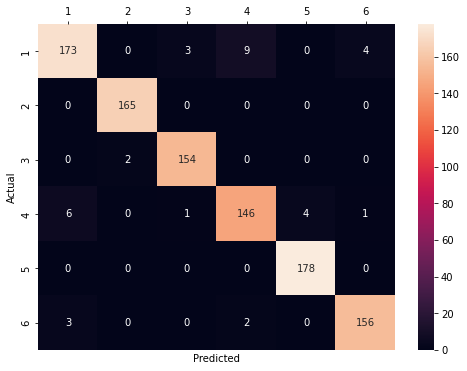

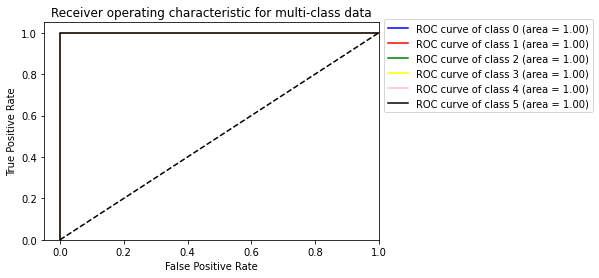

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='poly', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.83      0.95      0.88       189
           2       0.99      1.00      0.99       165
           3       0.97      0.99      0.98       156
           4       0.95      0.76      0.85       158
           5       0.98      1.00      0.99       178
           6       0.97      0.96      0.97       161

    accuracy                           0.94      1007
   macro avg       0.95      0.94      0.94      1007
weighted avg       0.95      0.94      0.94      1007



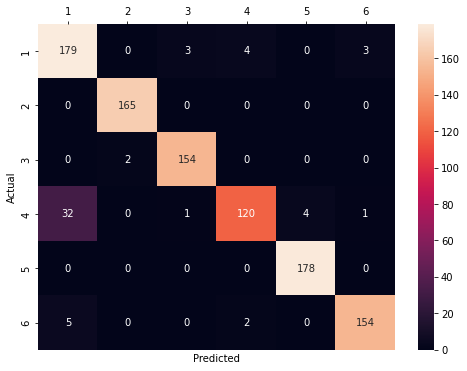

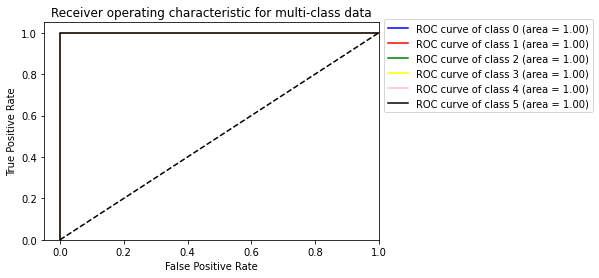

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='sigmoid', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.88      0.82      0.85       189
           2       0.98      1.00      0.99       165
           3       0.92      0.94      0.93       156
           4       0.88      0.89      0.88       158
           5       0.98      0.99      0.99       178
           6       0.92      0.94      0.93       161

    accuracy                           0.93      1007
   macro avg       0.93      0.93      0.93      1007
weighted avg       0.93      0.93      0.93      1007



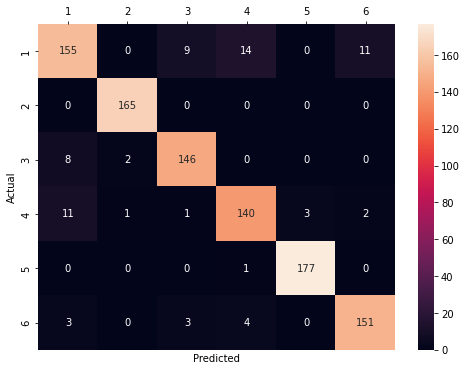

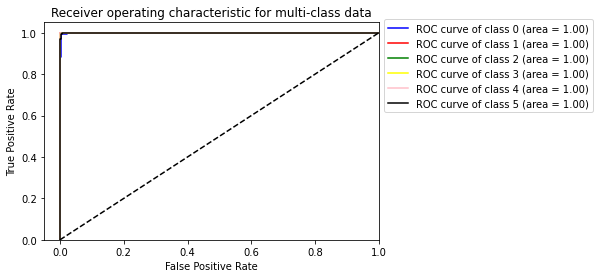

*********************************************************************************************
************Performance Evaluation for AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300) ***************************************
              precision    recall  f1-score   support

           1       0.39      0.71      0.50       189
           2       1.00      0.97      0.98       165
           3       0.84      0.52      0.64       156
           4       0.42      0.65      0.51       158
           5       0.94      0.43      0.59       178
           6       0.79      0.37      0.51       161

    accuracy                           0.61      1007
   macro avg       0.73      0.61      0.62      1007
weighted avg       0.72      0.61      0.62      1007



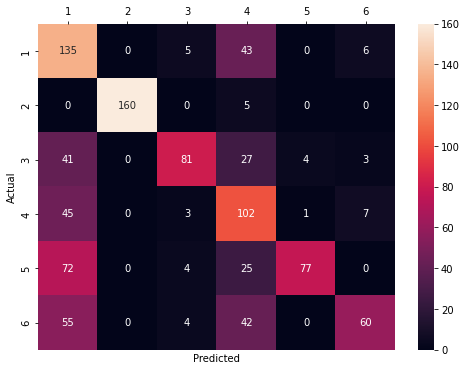

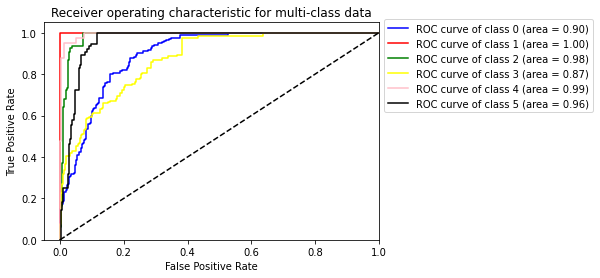

*********************************************************************************************
**************End of classification of emails using TFIDFembeddings *****************
**************Classification of emails using gensim word2vecembeddings *********************
************Performance Evaluation for MultinomialNB(alpha=0.01) ***************************************
              precision    recall  f1-score   support

           1       0.44      0.62      0.51       189
           2       0.55      0.42      0.47       165
           3       0.33      0.17      0.23       156
           4       0.59      0.34      0.43       158
           5       0.42      0.33      0.37       178
           6       0.25      0.47      0.33       161

    accuracy                           0.40      1007
   macro avg       0.43      0.39      0.39      1007
weighted avg       0.43      0.40      0.39      1007



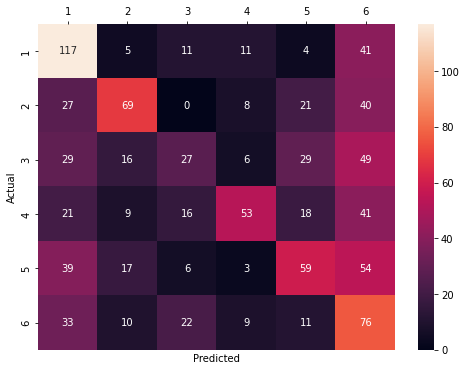

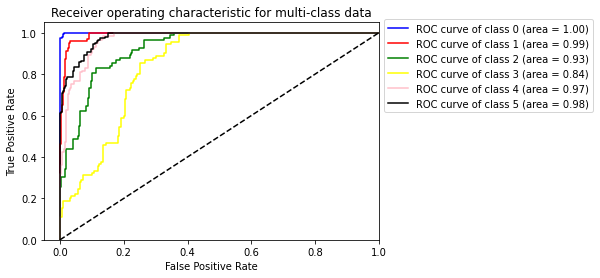

*********************************************************************************************
************Performance Evaluation for LogisticRegression() ***************************************
              precision    recall  f1-score   support

           1       0.69      0.57      0.62       189
           2       0.95      1.00      0.97       165
           3       0.68      0.63      0.66       156
           4       0.60      0.65      0.62       158
           5       0.74      0.85      0.79       178
           6       0.79      0.76      0.77       161

    accuracy                           0.74      1007
   macro avg       0.74      0.74      0.74      1007
weighted avg       0.74      0.74      0.74      1007



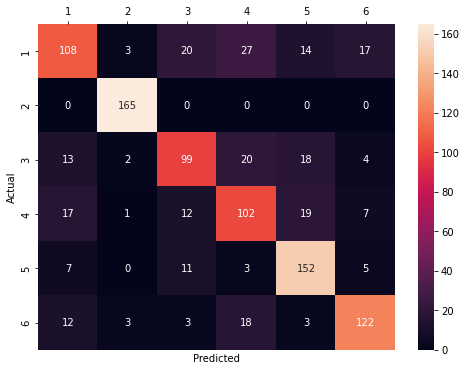

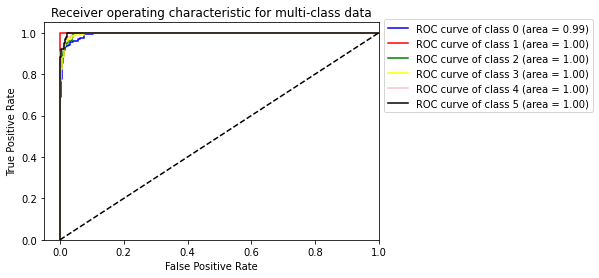

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='linear', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.72      0.65      0.68       189
           2       0.97      1.00      0.99       165
           3       0.78      0.84      0.81       156
           4       0.70      0.67      0.68       158
           5       0.87      0.94      0.91       178
           6       0.80      0.76      0.78       161

    accuracy                           0.81      1007
   macro avg       0.81      0.81      0.81      1007
weighted avg       0.81      0.81      0.81      1007



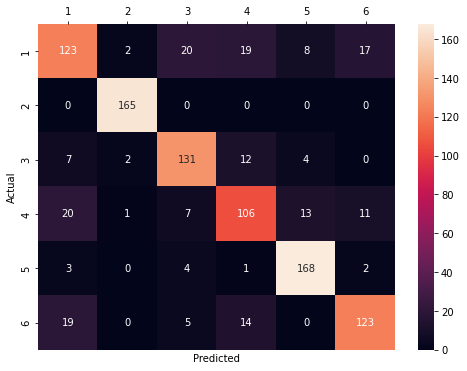

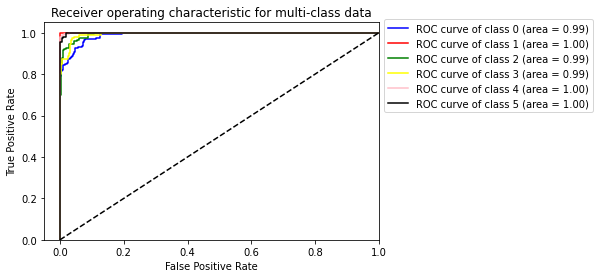

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', gamma=1, probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.83      0.99      0.90       189
           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       156
           4       0.98      0.78      0.87       158
           5       0.99      1.00      1.00       178
           6       0.99      0.96      0.97       161

    accuracy                           0.96      1007
   macro avg       0.97      0.96      0.96      1007
weighted avg       0.96      0.96      0.96      1007



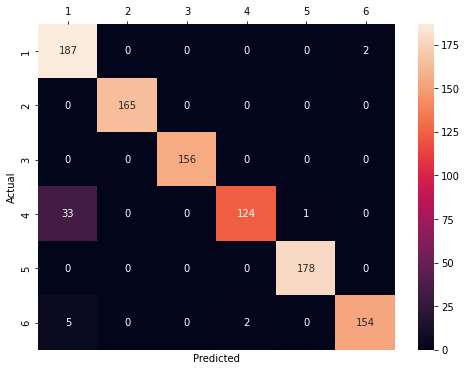

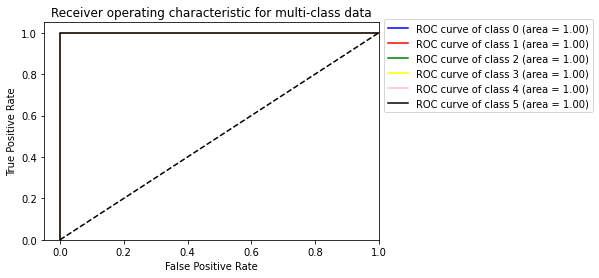

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='poly', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.59      0.83      0.69       189
           2       0.99      1.00      1.00       165
           3       0.89      0.79      0.84       156
           4       0.77      0.61      0.68       158
           5       0.87      0.85      0.86       178
           6       0.87      0.73      0.80       161

    accuracy                           0.81      1007
   macro avg       0.83      0.80      0.81      1007
weighted avg       0.83      0.81      0.81      1007



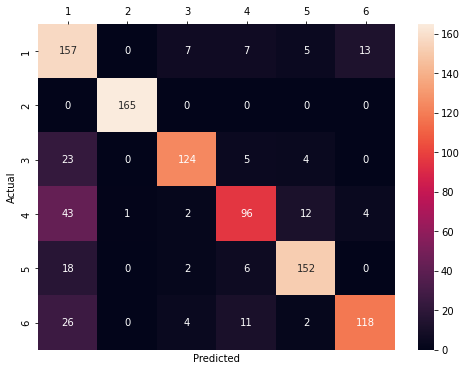

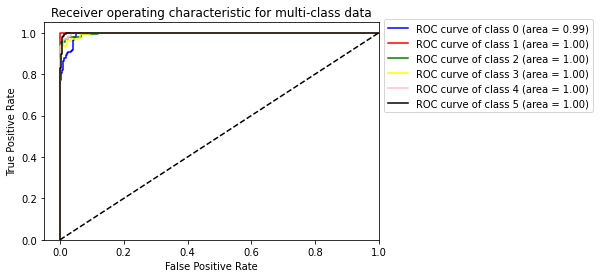

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='sigmoid', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.44      0.48      0.46       189
           2       0.21      0.48      0.29       165
           3       0.22      0.22      0.22       156
           4       0.16      0.17      0.17       158
           5       0.58      0.14      0.23       178
           6       0.47      0.18      0.26       161

    accuracy                           0.28      1007
   macro avg       0.35      0.28      0.27      1007
weighted avg       0.35      0.28      0.28      1007



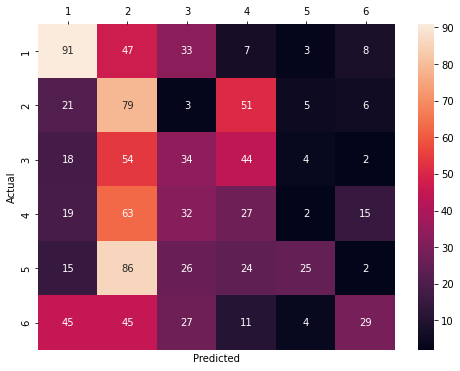

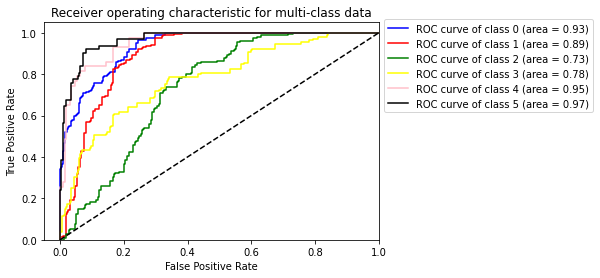

*********************************************************************************************
************Performance Evaluation for AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300) ***************************************
              precision    recall  f1-score   support

           1       0.47      0.65      0.54       189
           2       1.00      1.00      1.00       165
           3       0.85      0.48      0.61       156
           4       0.47      0.76      0.58       158
           5       0.91      0.66      0.77       178
           6       0.70      0.47      0.56       161

    accuracy                           0.67      1007
   macro avg       0.73      0.67      0.68      1007
weighted avg       0.73      0.67      0.68      1007



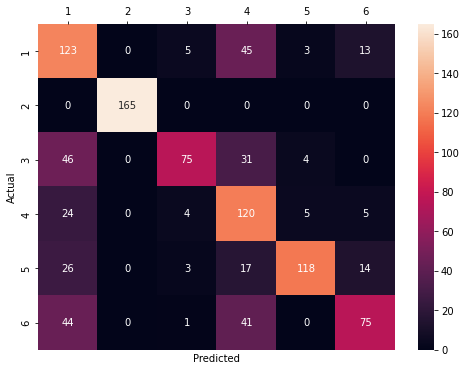

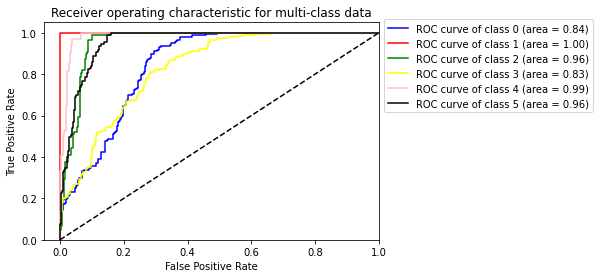

*********************************************************************************************
**************End of classification of emails using gensim word2vecembeddings *****************
**************Classification of emails using word2vec-google-news-300embeddings *********************
************Performance Evaluation for MultinomialNB(alpha=0.01) ***************************************
              precision    recall  f1-score   support

           1       0.39      0.56      0.46       189
           2       0.44      0.44      0.44       165
           3       0.21      0.19      0.20       156
           4       0.22      0.21      0.22       158
           5       0.34      0.20      0.25       178
           6       0.37      0.40      0.39       161

    accuracy                           0.34      1007
   macro avg       0.33      0.33      0.33      1007
weighted avg       0.33      0.34      0.33      1007



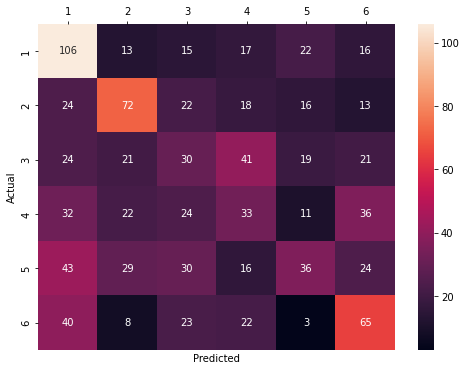

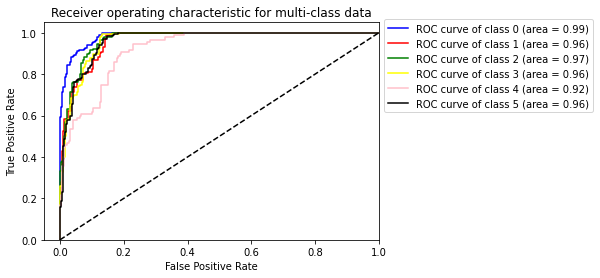

*********************************************************************************************
************Performance Evaluation for LogisticRegression() ***************************************
              precision    recall  f1-score   support

           1       0.41      0.60      0.49       189
           2       0.45      0.61      0.52       165
           3       0.31      0.22      0.26       156
           4       0.22      0.20      0.21       158
           5       0.45      0.21      0.29       178
           6       0.38      0.40      0.39       161

    accuracy                           0.38      1007
   macro avg       0.37      0.37      0.36      1007
weighted avg       0.37      0.38      0.36      1007



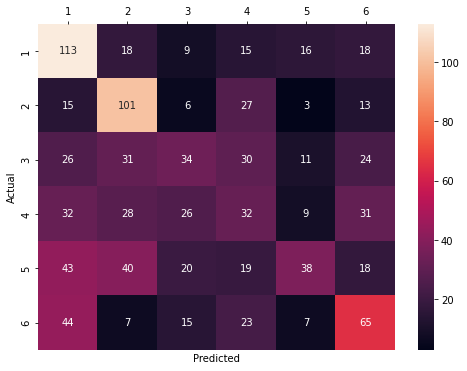

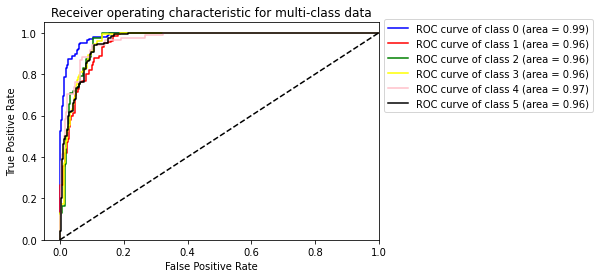

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='linear', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.34      0.70      0.46       189
           2       0.53      0.55      0.54       165
           3       0.32      0.13      0.18       156
           4       0.30      0.20      0.24       158
           5       0.39      0.31      0.35       178
           6       0.38      0.33      0.35       161

    accuracy                           0.38      1007
   macro avg       0.38      0.37      0.35      1007
weighted avg       0.38      0.38      0.36      1007



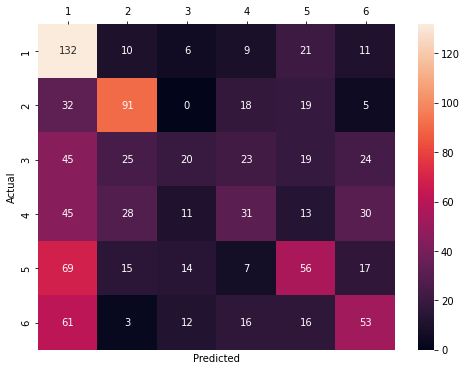

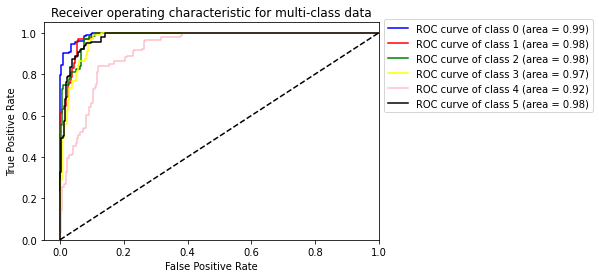

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', gamma=1, probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.39      0.66      0.49       189
           2       0.54      0.58      0.56       165
           3       0.32      0.25      0.28       156
           4       0.29      0.20      0.24       158
           5       0.42      0.36      0.39       178
           6       0.42      0.33      0.37       161

    accuracy                           0.40      1007
   macro avg       0.40      0.40      0.39      1007
weighted avg       0.40      0.40      0.39      1007



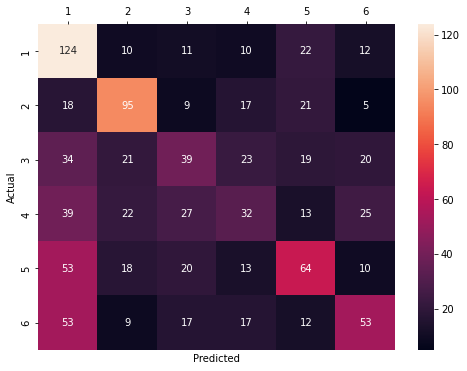

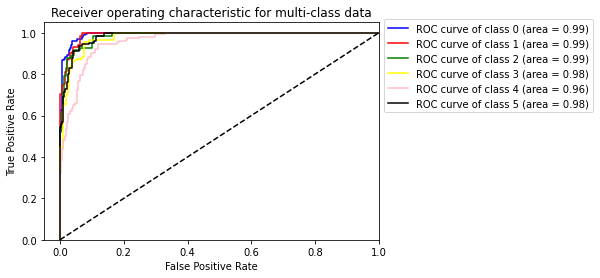

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='poly', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.34      0.70      0.46       189
           2       0.52      0.57      0.54       165
           3       0.29      0.13      0.18       156
           4       0.26      0.17      0.21       158
           5       0.39      0.31      0.34       178
           6       0.40      0.33      0.36       161

    accuracy                           0.38      1007
   macro avg       0.37      0.37      0.35      1007
weighted avg       0.37      0.38      0.35      1007



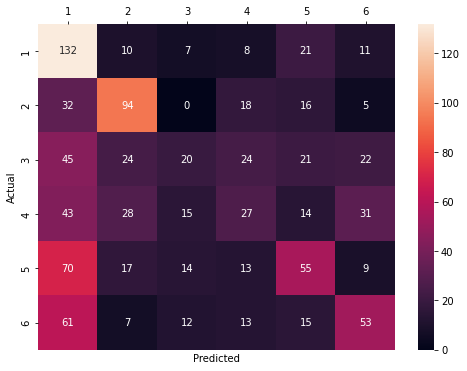

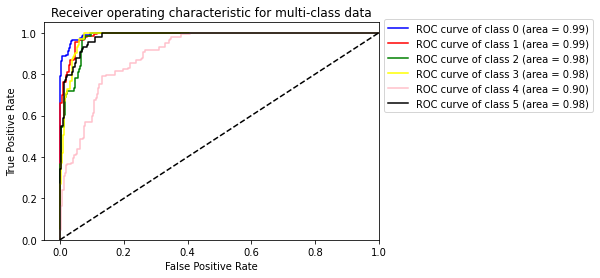

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='sigmoid', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       189
           2       0.21      0.54      0.30       165
           3       0.26      0.18      0.21       156
           4       0.18      0.42      0.25       158
           5       0.00      0.00      0.00       178
           6       0.27      0.18      0.22       161

    accuracy                           0.21      1007
   macro avg       0.15      0.22      0.16      1007
weighted avg       0.15      0.21      0.16      1007



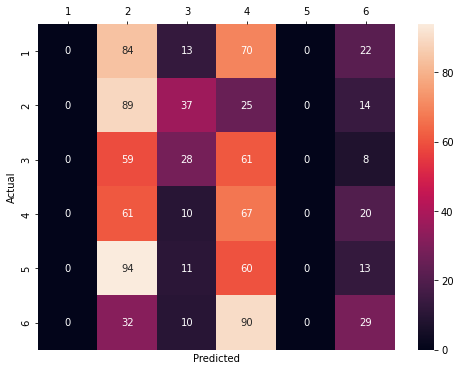

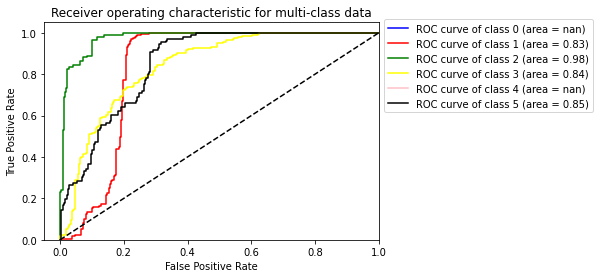

*********************************************************************************************
************Performance Evaluation for AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300) ***************************************
              precision    recall  f1-score   support

           1       0.35      0.76      0.48       189
           2       1.00      0.68      0.81       165
           3       0.80      0.31      0.44       156
           4       0.35      0.57      0.43       158
           5       0.98      0.51      0.67       178
           6       0.67      0.30      0.41       161

    accuracy                           0.53      1007
   macro avg       0.69      0.52      0.54      1007
weighted avg       0.69      0.53      0.54      1007



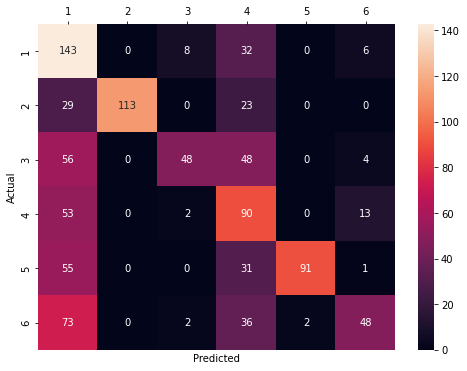

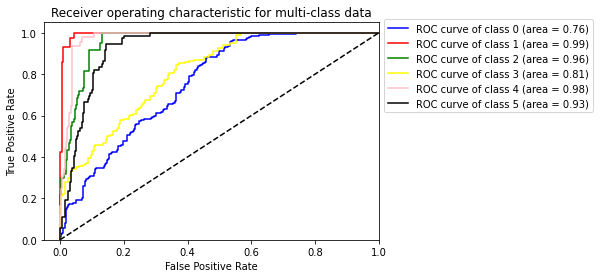

*********************************************************************************************
**************End of classification of emails using word2vec-google-news-300embeddings *****************
**************Classification of emails using glove-wiki-gigaword-300embeddings *********************
************Performance Evaluation for MultinomialNB(alpha=0.01) ***************************************
              precision    recall  f1-score   support

           1       0.39      0.54      0.45       189
           2       0.44      0.53      0.48       165
           3       0.24      0.18      0.21       156
           4       0.24      0.24      0.24       158
           5       0.23      0.11      0.15       178
           6       0.31      0.37      0.34       161

    accuracy                           0.33      1007
   macro avg       0.31      0.33      0.31      1007
weighted avg       0.31      0.33      0.31      1007



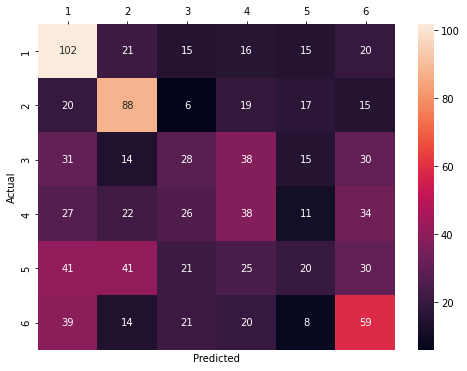

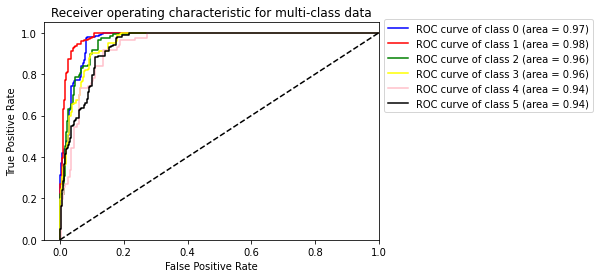

*********************************************************************************************
************Performance Evaluation for LogisticRegression() ***************************************
              precision    recall  f1-score   support

           1       0.44      0.56      0.49       189
           2       0.47      0.58      0.52       165
           3       0.38      0.31      0.35       156
           4       0.34      0.27      0.30       158
           5       0.45      0.39      0.42       178
           6       0.39      0.38      0.39       161

    accuracy                           0.42      1007
   macro avg       0.41      0.42      0.41      1007
weighted avg       0.41      0.42      0.41      1007



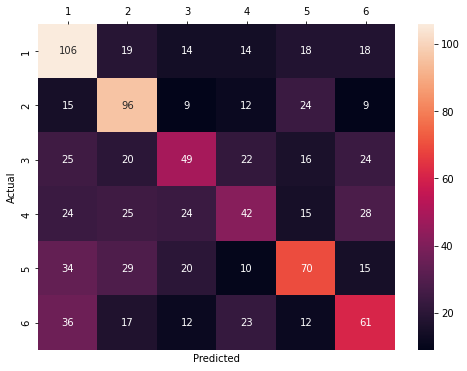

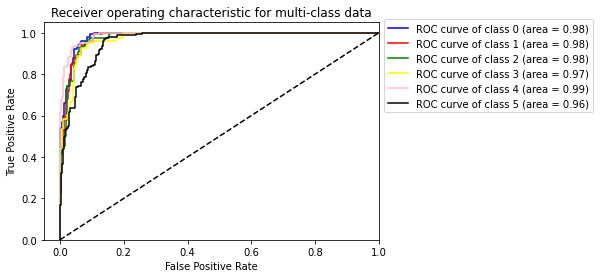

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='linear', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.43      0.59      0.50       189
           2       0.61      0.63      0.62       165
           3       0.35      0.36      0.36       156
           4       0.44      0.34      0.38       158
           5       0.49      0.43      0.46       178
           6       0.46      0.41      0.43       161

    accuracy                           0.46      1007
   macro avg       0.46      0.46      0.46      1007
weighted avg       0.46      0.46      0.46      1007



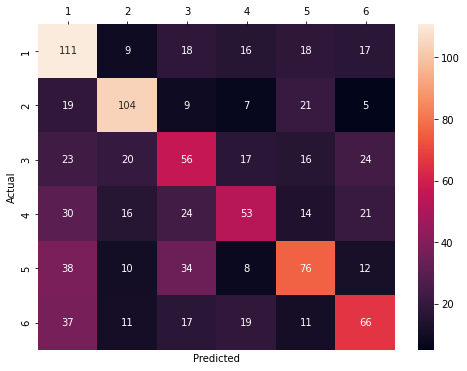

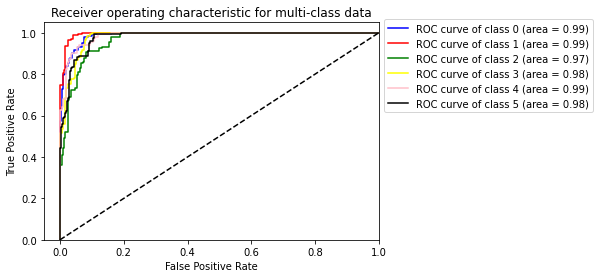

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', gamma=1, probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.48      0.56      0.52       189
           2       0.69      0.80      0.74       165
           3       0.41      0.47      0.44       156
           4       0.55      0.37      0.44       158
           5       0.54      0.55      0.54       178
           6       0.52      0.42      0.46       161

    accuracy                           0.53      1007
   macro avg       0.53      0.53      0.52      1007
weighted avg       0.53      0.53      0.53      1007



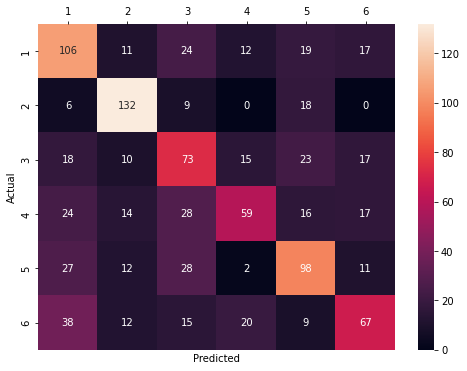

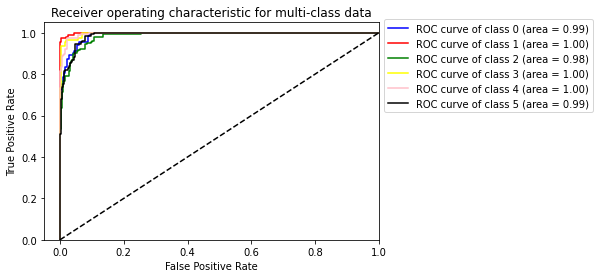

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='poly', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.35      0.69      0.46       189
           2       0.47      0.59      0.52       165
           3       0.36      0.11      0.17       156
           4       0.35      0.18      0.24       158
           5       0.42      0.33      0.37       178
           6       0.40      0.40      0.40       161

    accuracy                           0.39      1007
   macro avg       0.39      0.38      0.36      1007
weighted avg       0.39      0.39      0.37      1007



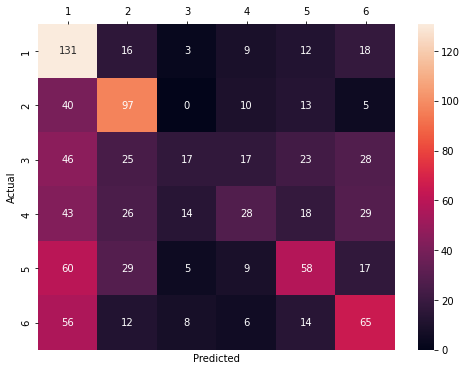

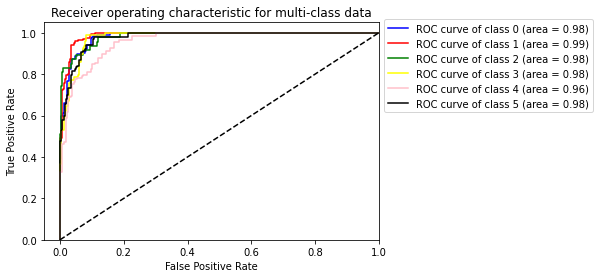

*********************************************************************************************
************Performance Evaluation for SVC(C=1, decision_function_shape='ovo', kernel='sigmoid', probability=True) ***************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       189
           2       0.63      0.24      0.34       165
           3       0.17      0.71      0.28       156
           4       0.23      0.43      0.30       158
           5       0.00      0.00      0.00       178
           6       0.35      0.04      0.07       161

    accuracy                           0.22      1007
   macro avg       0.23      0.23      0.16      1007
weighted avg       0.22      0.22      0.16      1007



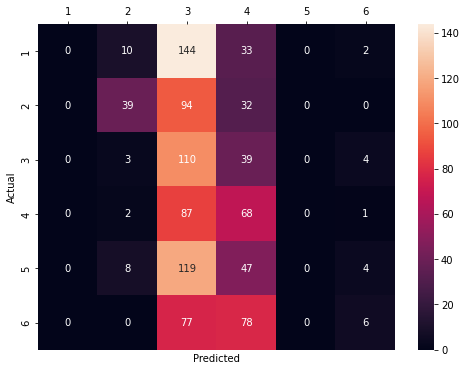

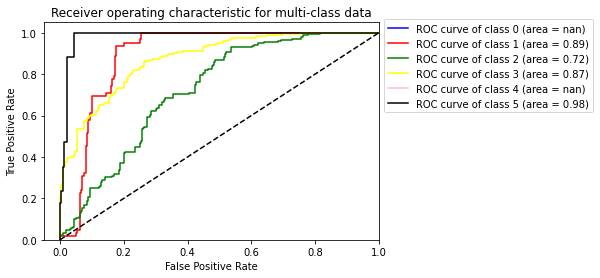

*********************************************************************************************
************Performance Evaluation for AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300) ***************************************
              precision    recall  f1-score   support

           1       0.37      0.74      0.50       189
           2       1.00      0.93      0.96       165
           3       0.82      0.41      0.55       156
           4       0.38      0.52      0.44       158
           5       1.00      0.51      0.67       178
           6       0.64      0.39      0.48       161

    accuracy                           0.59      1007
   macro avg       0.70      0.58      0.60      1007
weighted avg       0.70      0.59      0.60      1007



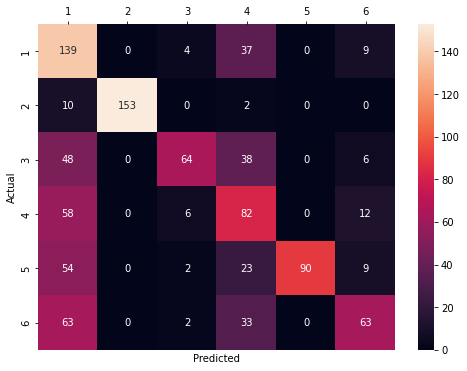

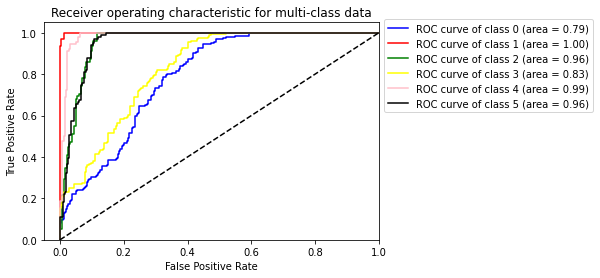

*********************************************************************************************
**************End of classification of emails using glove-wiki-gigaword-300embeddings *****************


In [46]:
#%%capture wontshutup
########    TFIDF   ##############################################################

tfidfvec=TfidfVectorizer()
X = tfidfvec.fit(Pre_pro_bal_data['Email_Text'])
X = tfidfvec.transform(Pre_pro_bal_data['Email_Text'])
y = Pre_pro_bal_data['Class_Label']
Classification_over_models(X,y,"TFIDF")



########    gensim Word 2 Vector   ##############################################################
X = Pre_pro_bal_data['gensim_Vector_Email_Text'].to_list()
y = Pre_pro_bal_data['Class_Label'].to_list()
Classification_over_models(X,y,"gensim word2vec")

########    Google Word 2 Vector   ##############################################################
X = Pre_pro_bal_data['google_Vector_Email_Text'].to_list()
y = Pre_pro_bal_data['Class_Label'].to_list()
Classification_over_models(X,y,"word2vec-google-news-300")

########    Glove Word 2 Vector   ##############################################################
X = Pre_pro_bal_data['glove_Vector_Email_Text'].to_list()
y = Pre_pro_bal_data['Class_Label'].to_list()
Classification_over_models(X,y,"glove-wiki-gigaword-300")



# f = open("Vlab_assignment_output.doc", "w") 
# print(wontshutup, file=f)
# f.close()

In [ ]:
#Pre_pro_bal_data.head()

In [ ]:
!pip install -U tensorflow
!pip install -U tensorflow-text
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
#from keras.layers.embeddings import Embedding
from sklearn.metrics import classification_report
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
def get_sentence_embeding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
Email_text_list = Pre_pro_bal_data['Email_Text'].to_list()

In [ ]:
vector_email_text = get_sentence_embeding(Email_text_list[0:1000])

In [ ]:
vector_email_text_2 = get_sentence_embeding(Email_text_list[1000:2000])

In [ ]:
vector_email_text_3 = get_sentence_embeding(Email_text_list[2000:3000])

In [ ]:
vector_email_text_4 = get_sentence_embeding(Email_text_list[3000:4000])

In [ ]:
vector_email_text_5 = get_sentence_embeding(Email_text_list[4000:5034])

(8449810, 10033380)

In [ ]:
#model.save("./Email_Text_gensim_word2vec.model")

In [ ]:
sentences = bigram[sent]
from collections import defaultdict  # For word frequency
#Most Frequent Words:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[:10]
